In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
sns.set()

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.duplicated().sum()

403

In [5]:
df.shape

(5574, 2)

1. Data Cleaning
2. EDA ( exploratory Data Analysis)
3. Text preprocessing ( stemming , vectorizations)
4. Model
5. Evaluation
6. Improvements
7. Website
8. Heroku py deployment

#  1. Data Cleaning 


In [6]:
df.info()
#there is nothing like null values and any other unused colums as well


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sms     5574 non-null   object
 1   label   5574 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [7]:
df.sample(5)

,sms,label
2185,I know a few people I can hit up and fuck to t...,0
1972,Enjoy ur life. . Good night\n,0
4216,No dear i was sleeping :-P\n,0
4825,Not thought bout it... || Drink in tap & spile...,0
923,It shall be fine. I have avalarr now. Will hol...,0


In [8]:
df  = df[['label','sms']]

In [9]:
df

,label,sms
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...\n
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5569,1,This is the 2nd time we have tried 2 contact u...
5570,0,Will ü b going to esplanade fr home?\n
5571,0,"Pity, * was in mood for that. So...any other s..."
5572,0,The guy did some bitching but I acted like i'd...


In [10]:
# For lable encoder you can use the code
# from sklearn.preprocessing import LabelEncoder
# encoder = LabelEncoder()
# encoder.fit_transform(df['target'])

In [11]:
# missing values 

In [12]:
df.isnull().sum()

label    0
sms      0
dtype: int64

In [13]:
# checking for duplicate values
df.duplicated().sum()

403

In [14]:
df = df.drop_duplicates(keep='first')


In [15]:
df.duplicated().sum()

0

In [16]:
df.shape

(5171, 2)

In [17]:
df['label'].value_counts()

0    4518
1     653
Name: label, dtype: int64

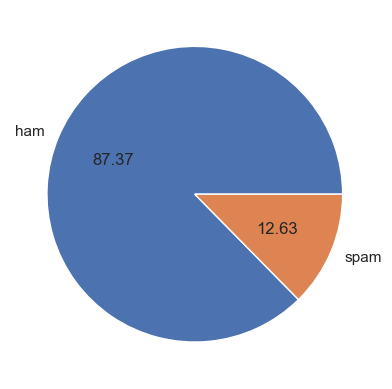

In [18]:
plt.pie(df['label'].value_counts(), labels=['ham','spam'],autopct='%0.2f')
plt.show()
#data is imbalance as there are more ham and less spam therefore data is imbalanced right now

# Analysis for No of Characters , Words , Sentensence in the SMS for that we will use the Natural Language Process toolkit NLTK

In [19]:
nltk.download('punkt') # download some dependencies for the work of nltk libraries

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [20]:
df['sms'].apply(len) # it will give the length of the text on the based of the characters 

0       112
1        30
2       156
3        50
4        62
       ... 
5569    161
5570     37
5571     58
5572    126
5573     27
Name: sms, Length: 5171, dtype: int64

# Checking the length of the Characters 

In [21]:
df['num_characters'] = df['sms'].apply(len) 

C:\Users\HP\AppData\Local\Temp\ipykernel_14076\465857610.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters'] = df['sms'].apply(len)


# Checking the length of the words for each sms

In [22]:
df['num_words'] = df['sms'].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\HP\AppData\Local\Temp\ipykernel_14076\2522176059.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['sms'].apply(lambda x:len(nltk.word_tokenize(x)))


# Checking the length of the Sentences in a sms

In [23]:
df['num_sentences'] = df['sms'].apply(lambda x:len(nltk.sent_tokenize(x)))

C:\Users\HP\AppData\Local\Temp\ipykernel_14076\1022291217.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences'] = df['sms'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [24]:
df

,label,sms,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",112,24,2
1,0,Ok lar... Joking wif u oni...\n,30,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,156,37,2
3,0,U dun say so early hor... U c already then say...,50,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",62,15,1
...,...,...,...,...,...
5569,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5570,0,Will ü b going to esplanade fr home?\n,37,9,1
5571,0,"Pity, * was in mood for that. So...any other s...",58,15,2
5572,0,The guy did some bitching but I acted like i'd...,126,27,1


# Analyzing the whole three new features we introduced 

In [25]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5171.000000,5171.000000,5171.000000
mean,80.332431,18.603945,1.954748
std,58.333188,13.388286,1.366879
min,3.000000,1.000000,1.000000
25%,37.000000,9.000000,1.000000
50%,62.000000,15.000000,1.000000
75%,120.000000,26.500000,2.000000
max,911.000000,220.000000,28.000000


#  Analyzing the HAM Three new features separately

In [26]:
df[df['label']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4518.000000,4518.000000,4518.000000
mean,71.894865,17.279327,1.806109
std,56.590179,13.572536,1.281858
min,3.000000,1.000000,1.000000
25%,35.000000,8.000000,1.000000
50%,54.000000,13.000000,1.000000
75%,92.000000,22.000000,2.000000
max,911.000000,220.000000,28.000000


# Analyzing the SPAM whole three new features we introduced 

In [27]:
df[df['label']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,138.710567,27.768760,2.983155
std,29.818940,6.987509,1.489645
min,14.000000,2.000000,1.000000
25%,133.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,158.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


# NOTE : From here you can see that the SPAM messages are always greater in the length then the SPAM messages

# Using Histogram to check it more clearly

# Histogram with the respect of the Characters

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

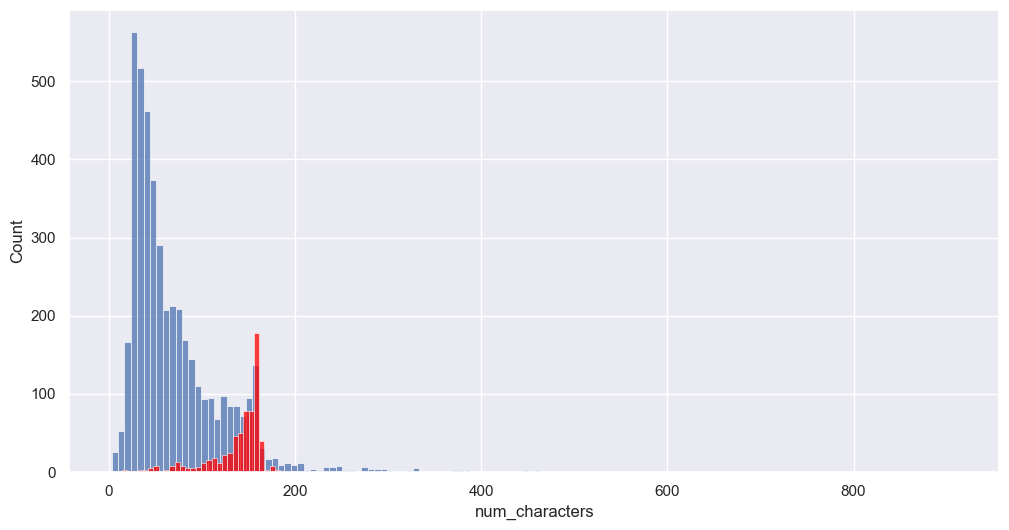

In [28]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['label']==0]['num_characters'])
sns.histplot(df[df['label']==1]['num_characters'],color='red')

# Histogram with the respect of the Words

<AxesSubplot:xlabel='num_words', ylabel='Count'>

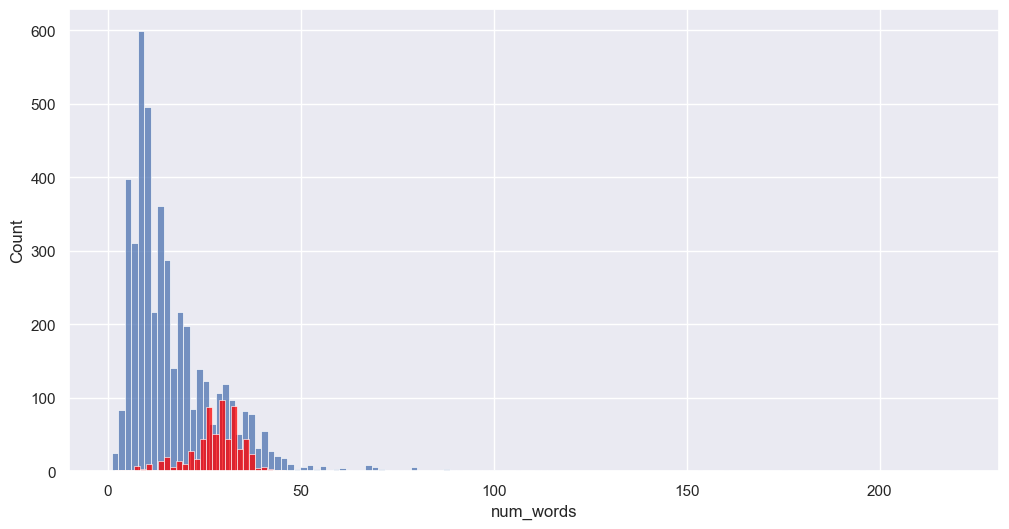

In [29]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['label']==0]['num_words'])
sns.histplot(df[df['label']==1]['num_words'],color='red')

# Checking relationship of Colums with each other , no of characters with words , sentences and vice versa

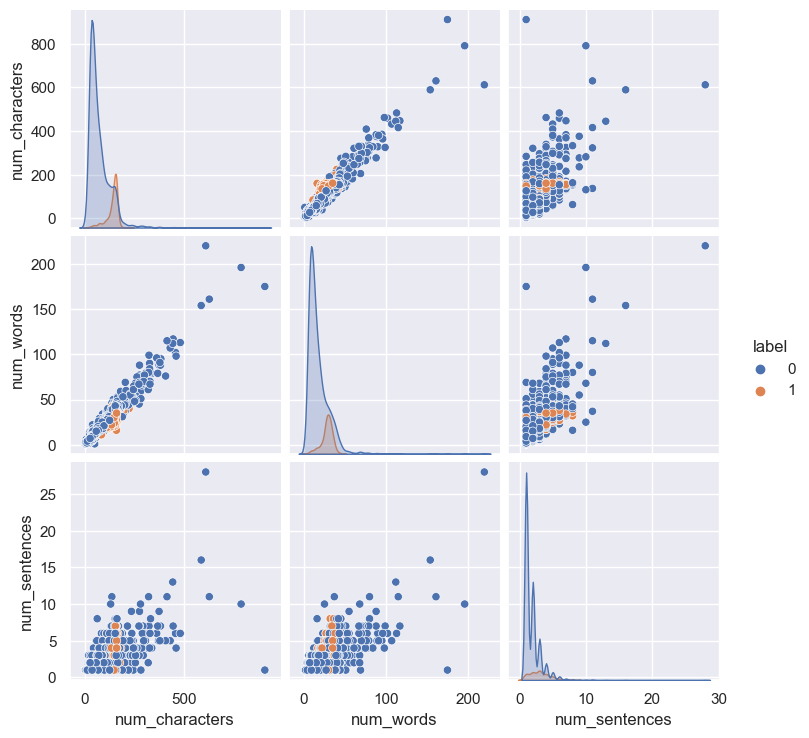

In [30]:
sns.pairplot(df,hue='label')

As you can see that there are some outliers here. Which can effect our analysis. We will tackle with them as well

# Very Important thing we can do here we can find the Correlations between these colums

In [31]:
df.corr()

,label,num_characters,num_words,num_sentences
label,1.000000,0.380505,0.260270,0.286062
num_characters,0.380505,1.000000,0.965931,0.637144
num_words,0.260270,0.965931,1.000000,0.683396
num_sentences,0.286062,0.637144,0.683396,1.000000


<AxesSubplot:>

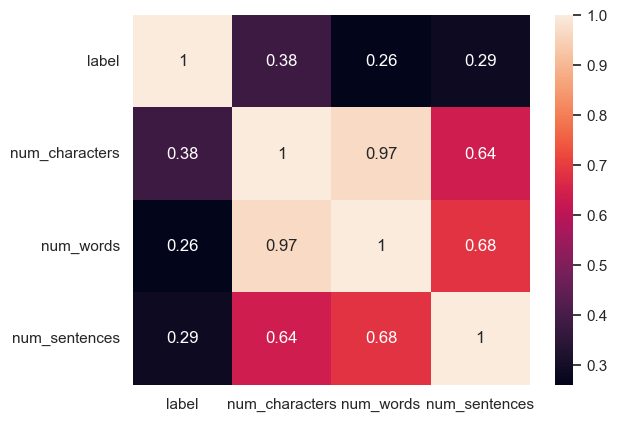

In [32]:
sns.heatmap(df.corr(), annot=True)

Very important thing you can see here that there is high corelation between sentences , words , characters with each other 
which means there is high multi colinearity and therefore if you need to make model here you will take one of them either the characters , words or sentences and Upon on checking the correlation with label value we can see that character do have 0.38 tendency means we can define the value of Spam with no of characters 

# Data Preprocessing

- Lower Case
- Tokenization
- Remove Special Characters
- Removing stop words and punctuations
- Stemming

In [33]:
ps = PorterStemmer()

In [34]:
def data_transform(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    #text is converted into the list here therefore so removing special characters
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    # removing stop words and the punctuations and doing stemming
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(ps.stem(i))
    
    return " ".join(y)

In [35]:
df['transformed_text'] = df['sms'].apply(data_transform)

C:\Users\HP\AppData\Local\Temp\ipykernel_14076\4027103272.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['sms'].apply(data_transform)


In [36]:
df.head(5)

,label,sms,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",112,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...\n,30,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,156,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,50,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",62,15,1,nah think goe usf live around though


# Making wordclouds of the spam words

In [37]:
wc = WordCloud(width=500 , height=500 , min_font_size=10 , background_color='white')

In [38]:
spam_wc = wc.generate(df[df['label']== 1]['transformed_text'].str.cat(sep=" "))

# Showing the Wordcloud object of the Spam Transformed Text

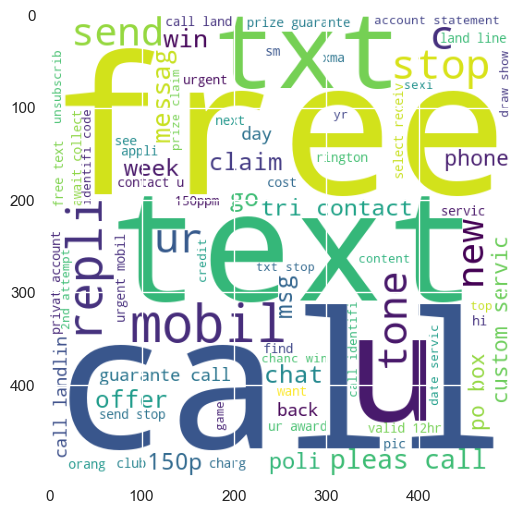

In [39]:
plt.figure(figsize=(20,6))
plt.imshow(spam_wc)


Here you can see that these kind of spam text we always get for exmaple " call us it is very urgent and that kind of fake "

# Making cloudwords for the HAM messages 

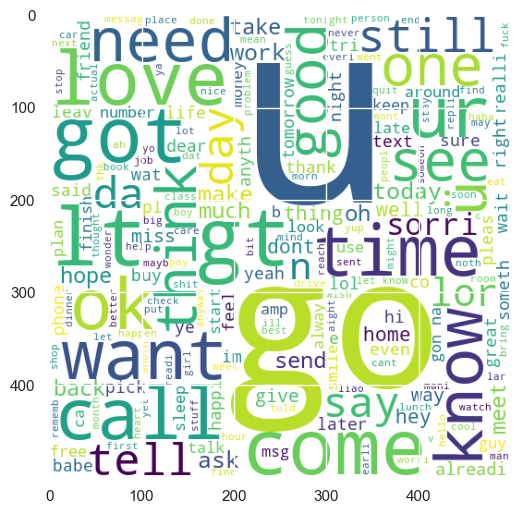

In [40]:
ham_wc = wc.generate(df[df['label']== 0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(20,6))
plt.imshow(ham_wc)


# Looking more into the depth regarding the Top 30 Spam and Ham words

# Getting list of all Spam Words

In [41]:
spam_corps = []
for msg in df[df['label']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corps.append(word)
   
    
        

# Getting list of all Ham Words

In [42]:
ham_corps = []
for msg in df[df['label']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corps.append(word)

# Importing the Relevant Library for the Checking most common 30 words

In [43]:
from collections import Counter



# Saving most common SPAM and HAM words

In [44]:
popular_spam_words = pd.DataFrame(Counter(spam_corps).most_common(30))
popular_ham_words = pd.DataFrame(Counter(ham_corps).most_common(30))

# Showing the SPAM BARPLOT

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


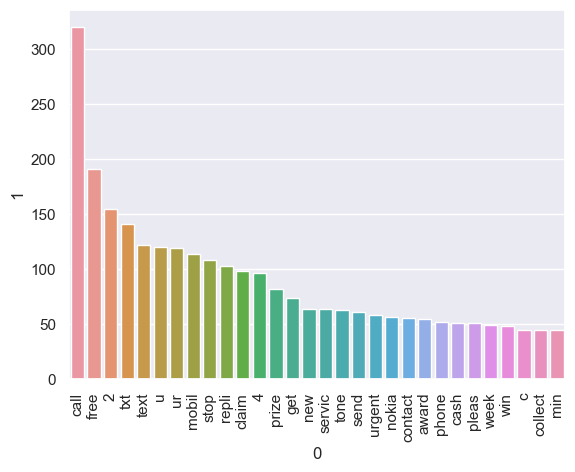

In [45]:
sns.barplot(popular_spam_words[0],popular_spam_words[1])
plt.xticks(rotation='vertical')
plt.show()

# Showing the HAM BARPLOT

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


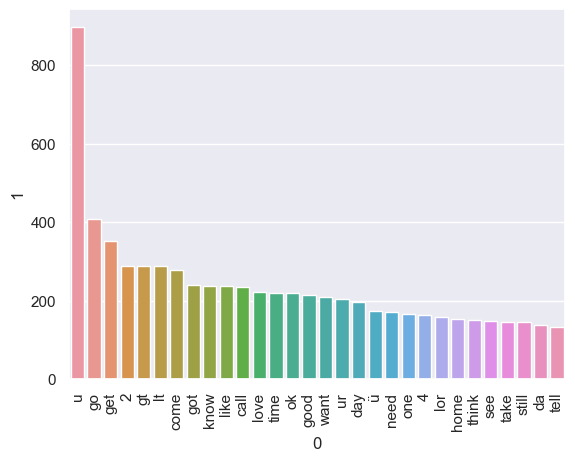

In [46]:
sns.barplot(popular_ham_words[0],popular_ham_words[1])
plt.xticks(rotation='vertical')
plt.show()

# 4. Model Building using CountVectorizer

It is understood in the machine learning terms that for the textual data for the better output we use the Naive Bayse Model for that

Model always take the numeric values which you can also that it take the Vectors that's why we will transform it

In [47]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [48]:
X = cv.fit_transform(df['transformed_text']).toarray()

In [49]:
X.shape

(5171, 6782)

In [50]:
y = df['label'].values  #target values

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , confusion_matrix , precision_score
#using the confusion matrix because our aim to lower the false positive 

In [52]:
X_train , X_test , y_train , y_test = train_test_split(X,y , train_size=0.2 , random_state=2)

In [53]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB  #calling all naivebayes because we don't about data distribution idk why he said that

In [54]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [55]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8982354363065023
[[3269  347]
 [  74  447]]
0.5629722921914357


In [56]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9726855209088712
[[3582   34]
 [  79  442]]
0.9285714285714286


In [57]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.8774474256707759
[[3615    1]
 [ 506   15]]
0.9375


# 4. Model Building using TFDF Vectorizer

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfdf = TfidfVectorizer(max_features=3000)# first we will use it without maxfeature


In [59]:
X_df =tfdf.fit_transform(df['transformed_text']).toarray()


In [60]:
X_df.shape

(5171, 3000)

In [61]:
y_df = df['label'].values

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , confusion_matrix , precision_score
#using the confusion matrix because our aim to lower the false positive 

In [63]:
X_train , X_test , y_train , y_test = train_test_split(X_df,y_df , train_size=0.2 , random_state=2)

In [64]:
X_train.shape

(1034, 3000)

In [65]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [66]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [67]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

TypeError: A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.

In [ ]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))
# the precision score here is telling that there is not even a single sms which is spam and our model didn't consider it.
#Our Model telling spam is spam and HAM is HAM

In [ ]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50 , random_state=2)

In [ ]:
rfc.fit(X_train,y_train)
random_pred = rfc.predict(X_test)
print(accuracy_score(y_test,random_pred))
print(precision_score(y_test,random_pred))

 Here we have two options either we will go with MultiGaussian or Either with BernoulliNB but here our accuracy score is not a great measure our precision score is our main measure because data is imbalanced that is because of the no of HAM's are greater in number than SPAM's

At this part we will go with the TFDF And MNB

# Very Very Very Import Part

# We will Train Different Models and will record their Precision and Accuracy

In [ ]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.ensemble import BaggingClassifier
# from sklearn.ensemble import ExtraTreesClassifier
# from sklearn.ensemble import GradientBoostingRegressor
# from xgboost import XGBClassifier

Hyperparameter Tuning is on the basic level of all Classifiers

In [ ]:
# svc = SVC(kernel='sigmoid', gamma=1.0)
# knc = KNeighborsClassifier()
# mnb = MultinomialNB()
# dtc = DecisionTreeClassifier(max_depth=5)
# lrc = LogisticRegression(solver='liblinear', penalty='l1')
# rfc = RandomForestClassifier(n_estimators=50 , random_state=2)
# abc = AdaBoostClassifier(n_estimators=50 , random_state=2)
# bc  = BaggingClassifier(n_estimators=50 , random_state=2)
# etc = ExtraTreesClassifier(n_estimators=50 , random_state=2)
# gbdt = GradientBoostingRegressor(n_estimators=50 , random_state=2)
# xgb = XGBClassifier(n_estimators=50 , random_state=2)



# Making Dictionaries of all Classifiers 

In [ ]:
# clfs = {
#     'SVC': svc,
#     'KN' : knc,
#     'NB' : mnb,
#     'DT' : dtc,
#     'LR' : lrc,
#     'RF' : rfc,
#     'AdaBoost' : abc,
#     'BgC' : bc,
#     'ETC' : etc,
# #     'GBDT' : gbdt,
#     'xgb' : xgb
    
# }

In [ ]:
# def train_classifier(clf, X_train , y_train , X_test , y_test):
#     clf.fit(X_train,y_train)
#     y_pred = clf.predict(X_test)
#     accuracy = accuracy_score(y_test , y_pred)
#     precision = precision_score(y_test, y_pred)
    
#     return accuracy,precision

# Example To test our function

In [ ]:
# train_classifier(svc, X_train , y_train , X_test , y_test)

# Collection all classifier Accuracy and Precision


In [ ]:
# accuracy_scores = []
# precission_scores = []

# for name , clf in clfs.items():
#     current_accuracy , current_precission = train_classifier(clf, X_train , y_train , X_test , y_test)
    
#     print("For",name)
#     print("Accuracy", current_accuracy)
#     print("Precission", current_precission)
    
    
#     accuracy_scores.append(current_accuracy)
#     precission_scores.append(current_precission)
    

In [ ]:
# accuracy_scores

In [ ]:
# performance_data_second = pd.DataFrame({
    
#     'Algorithm': clfs.keys(),
#     'Acurracy_max_ft_3000' : accuracy_scores,
#     'Precission_max_ft_3000':precission_scores
# }

# ).sort_values('Precission_max_ft_3000',ascending=False)

In [ ]:
# performance_data_second

In [ ]:
# performance_data = pd.melt(performance_data, id_vars="Algorithm")

In [ ]:
# performance_data

In [ ]:
# sns.catplot(
#              x='Algorithm',
#              y='value',
#              hue='variable',
#              data=performance_data, kind='bar' , height = 5
            
#            )
# plt.ylim(0.5,1.0)
# plt.xticks(rotation='vertical')
# plt.show()

In [ ]:
# performance_data_first = performance_data.pivot(index='Algorithm', columns='variable', values='value')

In [ ]:
# performance_data_first.sort_values('Precission',ascending=False)

# 5. Model Improvement

in model imporvment we do different things to bring the model Accuracy like tunning of Parameters and HyperParameters and other things.

1- The very first thing we will do for the improvement we introduce the max-features in our TFIDF and we can do here or do above in our line of code , we will do above 

In [ ]:
# performance_data_second

it is the dataset which we get after setting the max_features=3000 

# Putting the old and new data on the basis of the Merge option

In [ ]:
# performance_first_second = performance_data_first.merge(performance_data_second,on='Algorithm').sort_values(['Precission','Precission_max_ft_3000'],ascending=False)

# We can do the model Improvement with the help of Scaling of Feature

we will do the feature scaling on the X and let the other values remain the same.

In [ ]:
# from sklearn.preprocessing import MinMaxScaler # we are not using the StandardScalar because it also gives us the negative values
# that not accepted by the Naive byes

In [ ]:
# scalar = MinMaxScaler()

In [ ]:
# X_scalar = scalar.fit_transform(X_df)

In [ ]:
# y = df['label'].values  #target values


In [ ]:
# # from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score , confusion_matrix , precision_score
# using the confusion matrix because our aim to lower the false positive 

In [ ]:
# X_train , X_test , y_train , y_test = train_test_split(X_scalar,y_df , train_size=0.2 , random_state=2)

In [ ]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.ensemble import BaggingClassifier
# from sklearn.ensemble import ExtraTreesClassifier
# from sklearn.ensemble import GradientBoostingRegressor
# from xgboost import XGBClassifier

In [ ]:
# svc = SVC(kernel='sigmoid', gamma=1.0)
# knc = KNeighborsClassifier()
# mnb = MultinomialNB()
# dtc = DecisionTreeClassifier(max_depth=5)
# lrc = LogisticRegression(solver='liblinear', penalty='l1')
# rfc = RandomForestClassifier(n_estimators=50 , random_state=2)
# abc = AdaBoostClassifier(n_estimators=50 , random_state=2)
# bc  = BaggingClassifier(n_estimators=50 , random_state=2)
# etc = ExtraTreesClassifier(n_estimators=50 , random_state=2)
# gbdt = GradientBoostingRegressor(n_estimators=50 , random_state=2)
# xgb = XGBClassifier(n_estimators=50 , random_state=2)


In [ ]:
# clfs = {
#     'SVC': svc,
#     'KN' : knc,
#     'NB' : mnb,
#     'DT' : dtc,
#     'LR' : lrc,
#     'RF' : rfc,
#     'AdaBoost' : abc,
#     'BgC' : bc,
#     'ETC' : etc,
# #     'GBDT' : gbdt,
#     'xgb' : xgb
    
# }

In [ ]:
# def train_classifier(clf, X_train , y_train , X_test , y_test):
#     clf.fit(X_train,y_train)
#     y_pred = clf.predict(X_test)
#     accuracy = accuracy_score(y_test , y_pred)
#     precision = precision_score(y_test, y_pred)
    
#     return accuracy,precision

In [ ]:
# train_classifier(svc, X_train , y_train , X_test , y_test)

In [ ]:
# accuracy_scores = []
# precission_scores = []

# for name , clf in clfs.items():
#     current_accuracy , current_precission = train_classifier(clf, X_train , y_train , X_test , y_test)
    
#     print("For",name)
#     print("Accuracy", current_accuracy)
#     print("Precission", current_precission)
    
    
#     accuracy_scores.append(current_accuracy)
#     precission_scores.append(current_precission)

In [ ]:
# performance_data_third_scaling = pd.DataFrame({
    
#     'Algorithm': clfs.keys(),
#     'Acurracy_scaling' : accuracy_scores,
#     'Precission_scaling':precission_scores
# }

# )

In [ ]:
# performance_data_third_scaling

In [ ]:
# performance_first_second.merge(performance_data_third_scaling, on='Algorithm')

# Very Important , Very Inportant as you can see that our Precission scale went down therfore Scaling won't help us that much therefore will not use this for our model improvement

In [ ]:
# performance_first_second

we will take the step which we performed in the accuracy max ft 3000 because it is giving us the best precision at the moment.

In [ ]:
# X_train

# Voting Classifier

Here we are making the voting classifier by the combination of our top 4 models on the basis of the Best precision
By the combination of all our top models it will be the mixture of all and we will perform on it and check the precission and accuracy

In [ ]:
# mnb = MultinomialNB()
# # knc = KNeighborsClassifier()
# rfc = RandomForestClassifier(n_estimators=50 , random_state=2)
# etc = ExtraTreesClassifier(n_estimators=50 , random_state=2)

In [ ]:
# from sklearn.ensemble import VotingClassifier

In [ ]:
# voting = VotingClassifier(estimators=[('mnb',mnb), ('knc',knc) , ('rfc',rfc) , ('etc',etc)],voting='soft')

In [ ]:
# voting.fit(X_train,y_train)

In [ ]:
# voting_predict  = voting.predict(X_test)

In [ ]:
# print("Accuracy Score:" , accuracy_score(y_test, voting_predict))

In [ ]:
# print("Precission Score", precision_score(y_test, voting_predict))

# Applying Stacking 

Stacking is like related to the Voting Classifier but the one difference is that we use the weight here as the final estimator

In [ ]:
# estimators = [('mnb',mnb), ('knc',knc) , ('rfc',rfc) , ('etc',etc)]

In [ ]:
# # final_estimator = SVC(kernel='sigmoid', gamma=1.0)
# # final_estimator = RandomForestClassifier(n_estimators=50 , random_state=2)
# final_estimator = ExtraTreesClassifier(n_estimators=50 , random_state=2)

In [ ]:
# from sklearn.ensemble import StackingClassifier
# stacking = StackingClassifier(estimators=estimators , final_estimator=final_estimator)

In [ ]:
# stacking.fit(X_train,y_train)

In [ ]:
# stacking_predict = stacking.predict(X_test)

In [ ]:
# print('Accuracy :',accuracy_score(y_test , stacking_predict))
# print('Precission :',precision_score(y_test , stacking_predict))

# After applying the stacking as well , We can see that our precission isn't getting better

# Another technique we will use that we will include one of our feature engineering column which is Character colum and will check the Prescission again


In [ ]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# tfdf = TfidfVectorizer(max_features=3000) 

In [ ]:
# X_df_feature = tfdf.fit_transform(df['transformed_text']).toarray()

In [ ]:
# X_df_feature = np.hstack((X_df_feature,df['num_characters'].values.reshape(-1,1)))

In [ ]:
# X_df_feature.shape

In [ ]:
# y = df['label'].values  #target values

In [ ]:
# X_train , X_test , y_train , y_test = train_test_split(X_df_feature,y_df , train_size=0.2 , random_state=2)

In [ ]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.ensemble import BaggingClassifier
# from sklearn.ensemble import ExtraTreesClassifier
# from sklearn.ensemble import GradientBoostingRegressor
# from xgboost import XGBClassifier

In [ ]:
# svc = SVC(kernel='sigmoid', gamma=1.0)
# knc = KNeighborsClassifier()
# mnb = MultinomialNB()
# dtc = DecisionTreeClassifier(max_depth=5)
# lrc = LogisticRegression(solver='liblinear', penalty='l1')
# rfc = RandomForestClassifier(n_estimators=50 , random_state=2)
# abc = AdaBoostClassifier(n_estimators=50 , random_state=2)
# bc  = BaggingClassifier(n_estimators=50 , random_state=2)
# etc = ExtraTreesClassifier(n_estimators=50 , random_state=2)
# gbdt = GradientBoostingRegressor(n_estimators=50 , random_state=2)
# xgb = XGBClassifier(n_estimators=50 , random_state=2)

In [ ]:
# clfs = {
#     'SVC': svc,
#     'KN' : knc,
#     'NB' : mnb,
#     'DT' : dtc,
#     'LR' : lrc,
#     'RF' : rfc,
#     'AdaBoost' : abc,
#     'BgC' : bc,
#     'ETC' : etc,
# #     'GBDT' : gbdt,
#     'xgb' : xgb
    
# }

In [ ]:
# def train_classifier(clf, X_train , y_train , X_test , y_test):
#     clf.fit(X_train,y_train)
#     y_pred = clf.predict(X_test)
#     accuracy = accuracy_score(y_test , y_pred)
#     precision = precision_score(y_test, y_pred)
    
#     return accuracy,precision

In [ ]:
# accuracy_scores = []
# precission_scores = []

# for name , clf in clfs.items():
#     current_accuracy , current_precission = train_classifier(clf, X_train , y_train , X_test , y_test)
    
#     print("For",name)
#     print("Accuracy", current_accuracy)
#     print("Precission", current_precission)
    
    
#     accuracy_scores.append(current_accuracy)
#     precission_scores.append(current_precission)

In [ ]:
# performance_data_character = pd.DataFrame({
    
#     'Algorithm': clfs.keys(),
#     'Acurracy_character' : accuracy_scores,
#     'Precission_character':precission_scores
# }

# )

In [ ]:
# performance_first_second.merge(performance_data_character, on='Algorithm').sort_values(['Precission','Precission_max_ft_3000','Precission_character'],ascending=False)

# By Seeing the result you can see that including Characters don't even help us and can't beat the Prescision of the Ft 3000 so we will go to that model based on TFDF max feature 3000 Because even RF value is good in max feature

# --------------- MOVING TO THE FINAL PART ------------------------

As we have selected our model and now will look into the actual piple which is going to be used 

1- Preprocessing 
2- Vectorization
3- Model Implementation

These are the process which we are going to use when we are going to encounter with new Email

In [ ]:
# import pickle

In [ ]:
# pickle.dump(tfdf,open('vectorizer.pkl','wb'))
# pickle.dump(mnb,open('model.pkl','wb'))
# pickle.dump(rfc,open('random_model.pkl','wb'))

In [ ]:
# pickle.dump(main_tfdf,open('vectorizer.pkl','wb'))
# pickle.dump(main_mnb,open('model.pkl','wb'))

In [ ]:
import joblib

In [ ]:
# joblib.dump(rfc, 'random_forest_model.pkl')


In [ ]:
# joblib.dump(tfdf, 'vectorizer.pkl')

In [ ]:
# joblib.dump(mnb,'bayessian_model.pkl')